In [32]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [33]:
data_path = 'sensor_readings_24.data'
df = pd.read_csv(data_path)
# Features estão nas colunas, exceto a última
X = df.iloc[:, :-1].values
# Label presente na última coluna
y = df.iloc[:, -1].values
print(X)

[[0.438 0.498 3.625 ... 0.444 0.443 0.429]
 [0.438 0.498 3.625 ... 0.444 0.446 0.429]
 [0.437 0.501 3.625 ... 0.444 0.444 0.429]
 ...
 [0.937 5.    4.034 ... 5.    5.    1.105]
 [0.945 4.052 4.052 ... 5.    5.    1.118]
 [0.95  4.066 5.    ... 5.    5.    1.168]]


# Primeira Questão

## Primeiro Metódo

In [34]:
def mcov1(X):
    # X é uma matriz de dimensão N x p, onde N é o número de amostras e p é o número de variáveis
    N, p = X.shape
    # m é a média de cada coluna
    m = np.mean(X, axis=0)
    # Inicializa a matriz de covariância
    soma = np.zeros((p, p))
    for j in range(N):
            # aux é a diferença entre a j-ésima amostra e a média
            # Reshape para garantir que aux seja uma matriz coluna
            aux = X[j, :].reshape(p,1) - m.reshape(p,1)
            soma += aux @ aux.T

    C = soma / N
    
    return C

C1 = mcov1(X)
print(C1)

[[ 0.64429378  0.25774343  0.14109919  0.06112554  0.02183335 -0.11725092
  -0.32221198 -0.17313098 -0.3326806  -0.2933401  -0.23037136 -0.23598585
  -0.17755227 -0.27982877 -0.18690922  0.05793543  0.10394279  0.11645266
   0.17023967  0.16622908  0.19983476  0.43077107  0.39652127  0.43242752]
 [ 0.25774343  1.98789812  0.56864023  0.30214911  0.28285058  0.08784358
  -0.10914603 -0.01353742 -0.10068077 -0.17052749 -0.42862975 -0.25911075
  -0.40933036 -0.26393574 -0.14894677 -0.04912134 -0.08585944 -0.04149665
   0.04655638  0.11692279  0.06652167 -0.00402519  0.10491815  0.17001914]
 [ 0.14109919  0.56864023  1.55585663  0.64769991  0.55047114  0.25758459
  -0.12896883 -0.25851141 -0.37231202 -0.29218848 -0.2708856  -0.36619736
  -0.32008489 -0.31900322 -0.28527856 -0.02700165 -0.08124026 -0.11426119
  -0.09074583 -0.00918973 -0.01109068  0.25563067  0.18116124  0.1094225 ]
 [ 0.06112554  0.30214911  0.64769991  1.71431308  1.09880567  0.52951466
  -0.12606044 -0.18621779 -0.300920

## Segundo Metódo

In [35]:
def mcov2(X):
    N, p = X.shape
    m = np.mean(X, axis=0)
    aux = X - m
    C = aux.T @ aux

    return C/N

C2 = mcov2(X)
print(C2)

[[ 0.64429378  0.25774343  0.14109919  0.06112554  0.02183335 -0.11725092
  -0.32221198 -0.17313098 -0.3326806  -0.2933401  -0.23037136 -0.23598585
  -0.17755227 -0.27982877 -0.18690922  0.05793543  0.10394279  0.11645266
   0.17023967  0.16622908  0.19983476  0.43077107  0.39652127  0.43242752]
 [ 0.25774343  1.98789812  0.56864023  0.30214911  0.28285058  0.08784358
  -0.10914603 -0.01353742 -0.10068077 -0.17052749 -0.42862975 -0.25911075
  -0.40933036 -0.26393574 -0.14894677 -0.04912134 -0.08585944 -0.04149665
   0.04655638  0.11692279  0.06652167 -0.00402519  0.10491815  0.17001914]
 [ 0.14109919  0.56864023  1.55585663  0.64769991  0.55047114  0.25758459
  -0.12896883 -0.25851141 -0.37231202 -0.29218848 -0.2708856  -0.36619736
  -0.32008489 -0.31900322 -0.28527856 -0.02700165 -0.08124026 -0.11426119
  -0.09074583 -0.00918973 -0.01109068  0.25563067  0.18116124  0.1094225 ]
 [ 0.06112554  0.30214911  0.64769991  1.71431308  1.09880567  0.52951466
  -0.12606044 -0.18621779 -0.300920

## Terceiro Metódo

In [36]:
def mcov3(X):
    N, p = X.shape
    m = np.mean(X, axis=0)
    R = np.zeros((p, p))
    for j in range (N):
        R = R + X[j, :].reshape(p, 1) @ X[j, :].reshape(p, 1).T
    
    m2 = m.reshape(p,1)
    C = R/N - m2@m2.T
    return C

C3 = mcov3(X)
print(C3)


[[ 0.64429378  0.25774343  0.14109919  0.06112554  0.02183335 -0.11725092
  -0.32221198 -0.17313098 -0.3326806  -0.2933401  -0.23037136 -0.23598585
  -0.17755227 -0.27982877 -0.18690922  0.05793543  0.10394279  0.11645266
   0.17023967  0.16622908  0.19983476  0.43077107  0.39652127  0.43242752]
 [ 0.25774343  1.98789812  0.56864023  0.30214911  0.28285058  0.08784358
  -0.10914603 -0.01353742 -0.10068077 -0.17052749 -0.42862975 -0.25911075
  -0.40933036 -0.26393574 -0.14894677 -0.04912134 -0.08585944 -0.04149665
   0.04655638  0.11692279  0.06652167 -0.00402519  0.10491815  0.17001914]
 [ 0.14109919  0.56864023  1.55585663  0.64769991  0.55047114  0.25758459
  -0.12896883 -0.25851141 -0.37231202 -0.29218848 -0.2708856  -0.36619736
  -0.32008489 -0.31900322 -0.28527856 -0.02700165 -0.08124026 -0.11426119
  -0.09074583 -0.00918973 -0.01109068  0.25563067  0.18116124  0.1094225 ]
 [ 0.06112554  0.30214911  0.64769991  1.71431308  1.09880567  0.52951466
  -0.12606044 -0.18621779 -0.300920

## Quarto Metódo

In [37]:
def mcov4(X):
    N, p = X.shape
    m = np.mean(X, axis=0)
    R = (X.T @ X)/N
    C = R - m.reshape(p,1)@m.reshape(p,1).T
    return C

C4 = mcov4(X)
print(C4)

[[ 0.64429378  0.25774343  0.14109919  0.06112554  0.02183335 -0.11725092
  -0.32221198 -0.17313098 -0.3326806  -0.2933401  -0.23037136 -0.23598585
  -0.17755227 -0.27982877 -0.18690922  0.05793543  0.10394279  0.11645266
   0.17023967  0.16622908  0.19983476  0.43077107  0.39652127  0.43242752]
 [ 0.25774343  1.98789812  0.56864023  0.30214911  0.28285058  0.08784358
  -0.10914603 -0.01353742 -0.10068077 -0.17052749 -0.42862975 -0.25911075
  -0.40933036 -0.26393574 -0.14894677 -0.04912134 -0.08585944 -0.04149665
   0.04655638  0.11692279  0.06652167 -0.00402519  0.10491815  0.17001914]
 [ 0.14109919  0.56864023  1.55585663  0.64769991  0.55047114  0.25758459
  -0.12896883 -0.25851141 -0.37231202 -0.29218848 -0.2708856  -0.36619736
  -0.32008489 -0.31900322 -0.28527856 -0.02700165 -0.08124026 -0.11426119
  -0.09074583 -0.00918973 -0.01109068  0.25563067  0.18116124  0.1094225 ]
 [ 0.06112554  0.30214911  0.64769991  1.71431308  1.09880567  0.52951466
  -0.12606044 -0.18621779 -0.300920

## Função nativa do Python

### Primeira x Nativa


In [38]:
# A flag bias=True indica que estamos calculando a covariância com N como divisor
# O padrão é bias=False, que divide por N-1
def nativa(X):
    return np.cov(X, rowvar=False, bias=True)
Cref = nativa(X)
Cmy = mcov1(X)
E  = Cmy - Cref
norma_e1 = np.linalg.norm(E)
print(norma_e1)
print(E)

1.484948873217008e-13
[[-1.11022302e-15 -3.88578059e-16  4.71844785e-16 -1.94289029e-16
   1.66533454e-16  1.66533454e-16  1.11022302e-16 -1.11022302e-16
  -2.22044605e-16  2.22044605e-16  1.66533454e-16 -1.11022302e-16
   6.93889390e-16 -3.88578059e-16  3.05311332e-16  2.77555756e-17
  -1.38777878e-17 -1.94289029e-16 -1.94289029e-16 -1.11022302e-16
  -5.55111512e-17 -3.88578059e-16 -6.10622664e-16  1.55431223e-15]
 [-3.88578059e-16 -2.88657986e-15 -1.99840144e-15  1.22124533e-15
  -2.77555756e-16  4.85722573e-16  1.38777878e-15  1.64798730e-16
   0.00000000e+00 -9.15933995e-16  1.11022302e-15  5.55111512e-17
  -5.55111512e-16  1.11022302e-16  1.66533454e-16  4.16333634e-17
  -2.08166817e-16 -1.52655666e-16 -4.85722573e-17 -9.71445147e-17
   2.35922393e-16 -1.54390389e-16  3.46944695e-16 -4.44089210e-16]
 [ 4.71844785e-16 -1.99840144e-15  2.19824159e-14  1.11022302e-15
   4.44089210e-16  8.88178420e-16 -5.27355937e-16 -1.27675648e-15
  -3.33066907e-16  5.55111512e-17 -3.33066907e-16 -1

### Segunda x Nativa


In [39]:
Cmy = mcov2(X)
E  = Cmy - Cref
norma_e2 = np.linalg.norm(E)
print(norma_e2)
print(E)

8.295035192520682e-16
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.93889390e-18
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.77555756e-17 -6.93889390e-18
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.77555756e-17
  -2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.22044605e-16  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.38777878e-17  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.55111512e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.38777878e-17  0.00000000e+00 -6.93889390e-18 -1.38777878e-17
   0.00000000e+00  8.67361738e-19 -1.38777878e-17  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  5.55111512e-17  0.00000000e+00  5

### Terceira x Nativa

In [40]:
Cmy = mcov3(X)
E  = Cmy - Cref
norma_e3 = np.linalg.norm(E)
print(norma_e3)
print(E)

2.3307118417611977e-13
[[-3.77475828e-15 -2.55351296e-15  1.30451205e-14  9.82547377e-15
   2.79984369e-15  1.79162241e-14 -2.33146835e-15  1.11022302e-16
   4.44089210e-15 -8.82627305e-15 -1.26287869e-14  6.49480469e-15
  -2.88657986e-15 -4.16333634e-15  5.91193761e-15 -4.02455846e-15
   5.21804822e-15 -3.44169138e-15  3.30291350e-15 -8.32667268e-16
   3.13638004e-15 -7.04991621e-15  2.88657986e-15 -8.32667268e-16]
 [-2.55351296e-15  8.21565038e-15  7.99360578e-15 -1.39332990e-14
  -2.58681965e-14  2.39530618e-14 -6.92501612e-15 -1.04222186e-14
  -1.99007477e-14 -2.77555756e-14 -3.27515792e-15 -1.83741911e-14
  -2.72004641e-15  2.16493490e-15 -4.49640325e-15 -2.51881849e-15
   2.05391260e-15 -8.16707812e-15 -6.24500451e-16  3.13638004e-15
  -2.44249065e-15 -1.57486871e-14  9.67281810e-15  6.24500451e-15]
 [ 1.30451205e-14  7.99360578e-15 -1.42108547e-14 -1.11022302e-15
  -7.66053887e-15  1.05471187e-14  9.29811783e-15  1.51545443e-14
  -1.15463195e-14 -5.88418203e-15  6.27276009e-15 -

### Quarta x Nativa

In [41]:
Cmy = mcov4(X)
E  = Cmy - Cref
norma_e4 = np.linalg.norm(E)
print(norma_e4)
print(E)

2.958191160479754e-14
[[-1.11022302e-15  1.11022302e-16  2.38697950e-15  9.43689571e-16
  -7.52869989e-16 -1.62370117e-15 -1.44328993e-15  1.11022302e-16
   2.66453526e-15  9.43689571e-16  6.93889390e-16 -1.05471187e-15
  -1.11022302e-15 -1.66533454e-16 -3.05311332e-16 -4.71844785e-16
  -5.55111512e-16 -3.33066907e-16 -2.49800181e-16 -1.66533454e-16
  -1.94289029e-16  9.43689571e-16 -1.11022302e-15  9.43689571e-16]
 [ 1.11022302e-16  7.32747196e-15  8.88178420e-16 -1.49880108e-15
   2.55351296e-15  1.74860126e-15 -1.59594560e-15 -6.52256027e-16
  -1.24900090e-15  1.55431223e-15  2.77555756e-16 -6.10622664e-16
  -5.55111512e-17 -1.38777878e-15 -5.55111512e-17  1.45716772e-16
   2.77555756e-16 -6.17561557e-16 -1.80411242e-16  2.77555756e-17
  -6.66133815e-16  2.38524478e-16  1.23512311e-15  2.77555756e-17]
 [ 2.38697950e-15  8.88178420e-16  4.44089210e-15  6.66133815e-16
   3.33066907e-16 -9.99200722e-16 -3.13638004e-15 -8.32667268e-16
   0.00000000e+00  3.33066907e-16  3.60822483e-15  8

In [42]:
# Comparação das normas das diferenças
normas = [norma_e1, norma_e2, norma_e3, norma_e4]
metodos = ['mcov1', 'mcov2', 'mcov3', 'mcov4']
df_normas = pd.DataFrame({'Método': metodos, 'Norma da Diferença': normas})
# Print the DataFrame to see the results
print(df_normas)

  Método  Norma da Diferença
0  mcov1        1.484949e-13
1  mcov2        8.295035e-16
2  mcov3        2.330712e-13
3  mcov4        2.958191e-14


# Segunda Questão

## Análise númerica do melhor tempo

In [43]:
metodos = {
    "Metodo 1": mcov1,
    "Metodo 2": mcov2,
    "Metodo 3": mcov3,
    "Metodo 4": mcov4, 
    "Metodo Nativo": nativa    
}

n_rodadas = 100
resultados = {}

for nome_metodo, funcao_metodo in metodos.items():
    
    tempos_rodada = [] 
    
    for i in range(n_rodadas):
        # time.perf_counter() é usado para medir o tempo de execução
        start_time = time.perf_counter() 
        
        # Executa a função de covariância
        funcao_metodo(X)
        
        end_time = time.perf_counter() 
        
        # Guarda o tempo decorrido
        tempos_rodada.append(end_time - start_time)
        
    # Armazena a lista de tempos para este método
    resultados[nome_metodo] = tempos_rodada

for nome_metodo, tempos in resultados.items():
    tempo_medio = np.mean(tempos)
    # Calcula o desvio-padrão dos tempos
    desvio_padrao = np.std(tempos)
    
    print(f"\nResultados do '{nome_metodo}':")
    print(f"    Tempo Médio de Execução: {tempo_medio:.6f} segundos")
    print(f"    Desvio-Padrão: {desvio_padrao:.6f} segundos")
    



Resultados do 'Metodo 1':
    Tempo Médio de Execução: 0.022823 segundos
    Desvio-Padrão: 0.002041 segundos

Resultados do 'Metodo 2':
    Tempo Médio de Execução: 0.000431 segundos
    Desvio-Padrão: 0.000081 segundos

Resultados do 'Metodo 3':
    Tempo Médio de Execução: 0.019691 segundos
    Desvio-Padrão: 0.002272 segundos

Resultados do 'Metodo 4':
    Tempo Médio de Execução: 0.000237 segundos
    Desvio-Padrão: 0.000025 segundos

Resultados do 'Metodo Nativo':
    Tempo Médio de Execução: 0.000433 segundos
    Desvio-Padrão: 0.000062 segundos


## Histograma

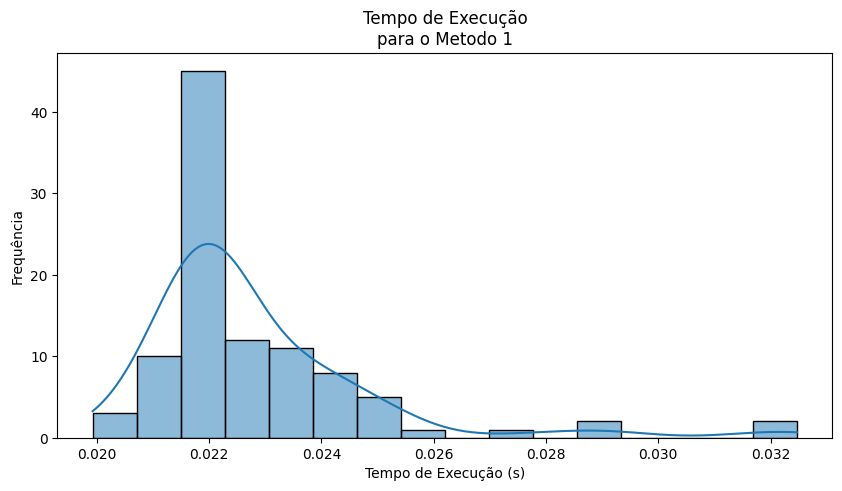

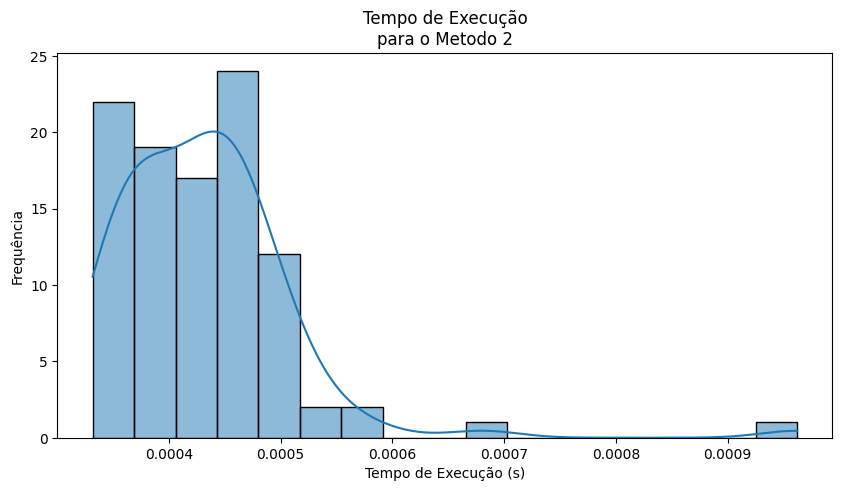

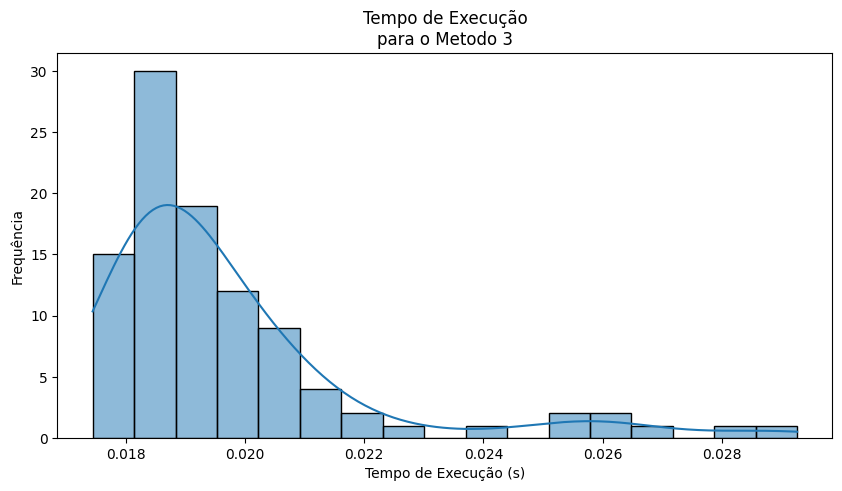

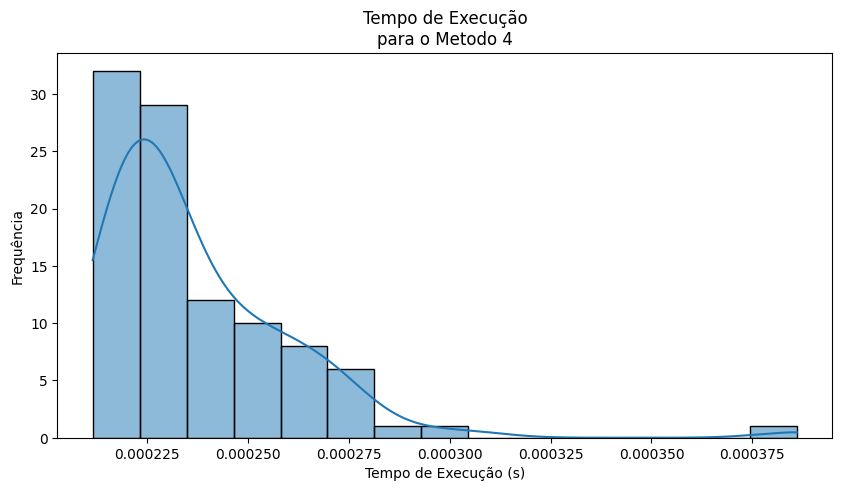

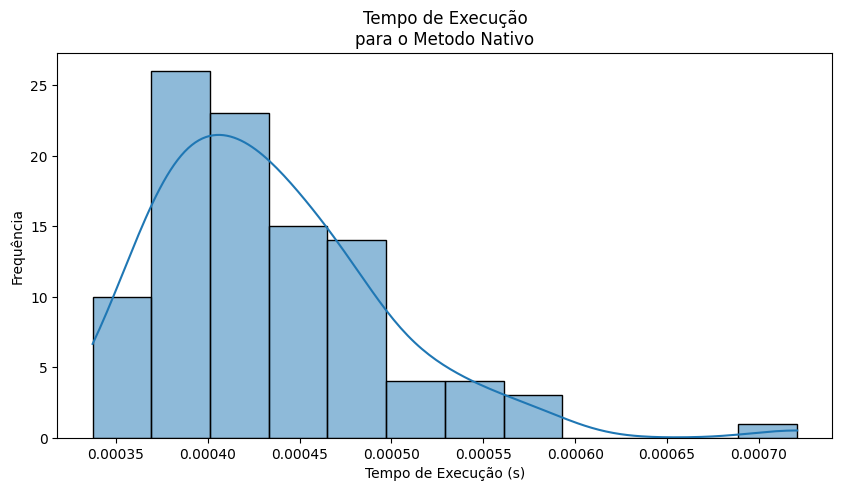

In [44]:
# Convertendo o dicionário para um DataFrame 
df_tempos = pd.DataFrame(resultados)

# Reformatando para o formato "longo" 
df_long = df_tempos.melt(var_name='Método', value_name='Tempo de Execução (s)')

for metodo in df_tempos.columns:
    plt.figure(figsize=(10, 5)) 
    sns.histplot(data=df_tempos, x=metodo, kde=True) # kde=True adiciona uma linha de densidade
    plt.title(f'Tempo de Execução\npara o {metodo}')
    plt.xlabel('Tempo de Execução (s)')
    plt.ylabel('Frequência')
    plt.show()

## Violin-plot

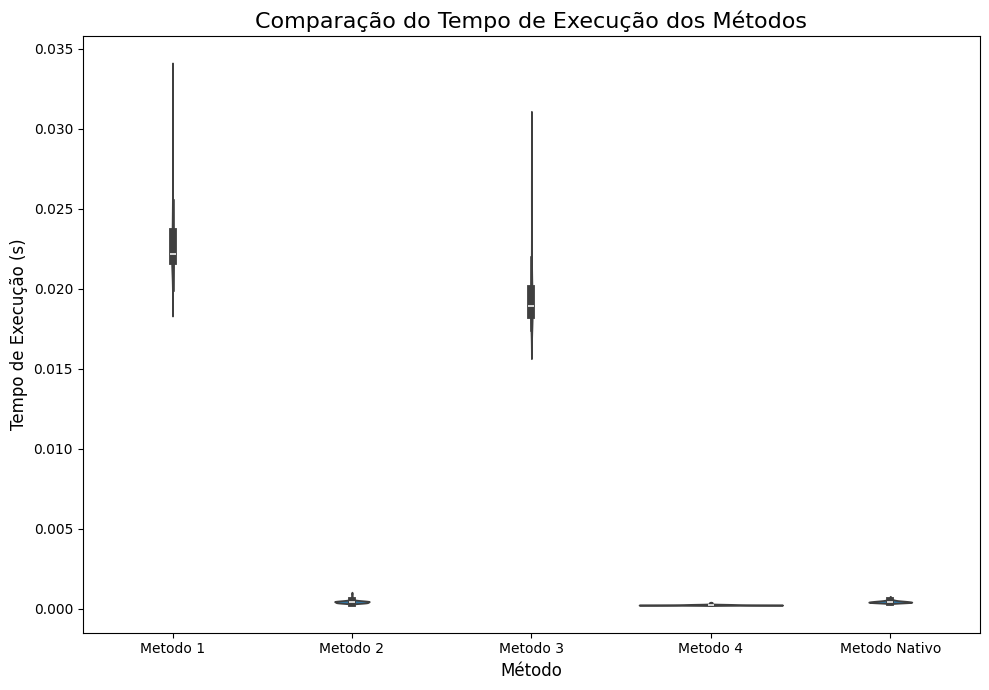

In [45]:
plt.figure(figsize=(10, 7))

sns.violinplot(data=df_long, x='Método', y='Tempo de Execução (s)')


plt.title('Comparação do Tempo de Execução dos Métodos', fontsize=16)
plt.xlabel('Método', fontsize=12)
plt.ylabel('Tempo de Execução (s)', fontsize=12)
plt.tight_layout() 
plt.show()

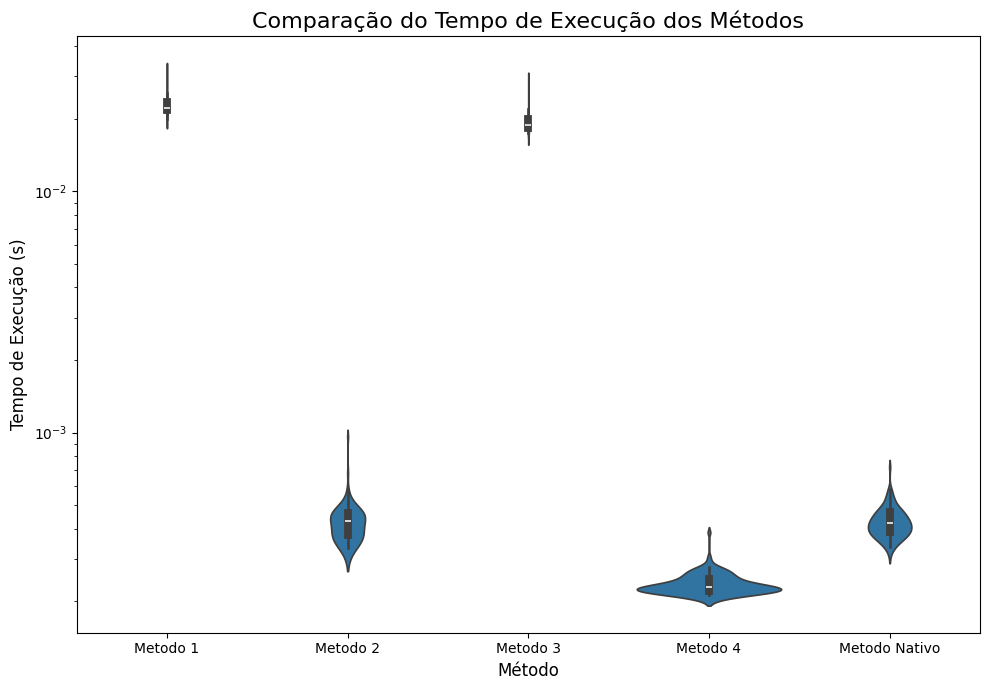

In [46]:
plt.figure(figsize=(10, 7))

sns.violinplot(data=df_long, x='Método', y='Tempo de Execução (s)')

# Ajustando o eixo y para escala logarítmica
plt.yscale('log')

plt.title('Comparação do Tempo de Execução dos Métodos', fontsize=16)
plt.xlabel('Método', fontsize=12)
plt.ylabel('Tempo de Execução (s)', fontsize=12)
plt.tight_layout() 
plt.show()

# Terceira Questão

## Cálculos de matrizes

In [47]:
# O metódo mais rápido é o quarto
# Matriz de covariância global
C_global = mcov4(X)

# Matriz de covariância por classe
classes_separadas = np.unique(y)
matrizes_por_classe = {}

for classe in classes_separadas:
    # Filtra os dados pertencentes à classe atual
    X_classe = X[y == classe]

    matrizes_por_classe[classe] = mcov4(X_classe)

# Exibe as matrizes de covariância por classe
for classe, matriz in matrizes_por_classe.items():
    print(f"Matriz de Covariância para a Classe {classe}:\n{matriz}\n") 

Matriz de Covariância para a Classe Move-Forward:
[[ 5.90616566e-01  2.33086286e-01  1.79221054e-01  2.12299086e-01
   1.91924368e-01  1.39040440e-02 -2.61491413e-01 -9.82943327e-02
  -2.38249780e-01 -1.99513998e-01 -1.09323817e-01 -1.99365842e-01
  -1.11637307e-01 -2.41630962e-01 -2.36439042e-01  9.39047007e-02
   7.54592510e-02  1.19520844e-01  1.41471592e-01  5.08172019e-02
   1.15638821e-01  4.53423620e-01  3.20477636e-01  2.86846713e-01]
 [ 2.33086286e-01  2.17652979e+00  5.73468656e-01  3.27984831e-01
   2.72257938e-01  4.08070274e-02  3.02412451e-03  1.73430789e-01
   6.01293748e-02 -5.39622048e-02 -3.41181222e-01 -4.17597465e-01
  -6.19677975e-01 -5.00063538e-01 -1.95422607e-01 -2.24237528e-02
  -4.26616196e-02  2.07617751e-03  1.79890215e-01  1.09828966e-01
   6.53059364e-02 -3.36300664e-02  1.49211338e-01  1.55797965e-01]
 [ 1.79221054e-01  5.73468656e-01  1.35125245e+00  3.59880460e-01
   3.39631081e-01 -9.11400956e-02 -1.61391304e-01 -1.29071540e-01
  -2.04070272e-01 -1.644

## Análise de invertibilidade

In [48]:
matrizes = {'Global': C_global}
matrizes.update(matrizes_por_classe)

print("\nAnálise de Invertibilidade e Condicionamento das Matrizes de Covariância")

print(f"\n{'Matriz':<18} | {'Posto':<5} | {'Condicionamento':<15}")


for nome, matriz in matrizes.items():
    p = matriz.shape[0]
    # Comando equivalente ao rank do octave/matlab
    posto = np.linalg.matrix_rank(matriz)
    # Comando equivalente ao inverso do rcond do octave/matlab
    num_cond = np.linalg.cond(matriz)
    
    print(f"{nome:<18} | {posto:<5} | {1/num_cond:<15.2e}")



Análise de Invertibilidade e Condicionamento das Matrizes de Covariância

Matriz             | Posto | Condicionamento
Global             | 24    | 4.87e-02       
Move-Forward       | 24    | 1.87e-02       
Sharp-Right-Turn   | 24    | 3.20e-02       
Slight-Left-Turn   | 24    | 5.77e-03       
Slight-Right-Turn  | 24    | 5.10e-03       


# Quarta Questão

In [49]:
def inverter_matriz(matriz):
    inversa = np.linalg.inv(matriz)
   
    return (inversa)

print("\nInversão das Matrizes de Covariância")
matrizes_invertidas = {}

for nome, matriz in matrizes.items():
    try:
        inversa = inverter_matriz(matriz)
        matrizes_invertidas[nome] = inversa
        print(f"Matriz {nome} invertida com sucesso.")
    except np.linalg.LinAlgError as e:
        print(f"Erro ao inverter a matriz {nome}: {e}")



Inversão das Matrizes de Covariância
Matriz Global invertida com sucesso.
Matriz Move-Forward invertida com sucesso.
Matriz Sharp-Right-Turn invertida com sucesso.
Matriz Slight-Left-Turn invertida com sucesso.
Matriz Slight-Right-Turn invertida com sucesso.


In [50]:
'''Como pudemos observar na terceira questão, os números de condicionamento das matrizes de covariância das classe estão muito próximos de zero,
nos obrigando a aplicar um técnica de regularização, neste caso, vamos multiplicar a matriz por um alpha e adicioná-la as matriz "principal" '''
alpha = 0.01

def inverter_matriz_reg(matriz):
    identidade = np.identity(matriz.shape[0])
    matriz_regularizada = matriz + alpha * identidade
   
    novo_condicionamento = np.linalg.cond(matriz_regularizada)
    inversa = np.linalg.inv(matriz_regularizada)
   
    return (inversa, novo_condicionamento)

resultados_inversao = {nome: inverter_matriz_reg(matriz)
                        for nome, matriz in matrizes.items()}



for nome, resultado in resultados_inversao.items():
        inversa, cond_num = resultado
        
        print(f"\nMatriz '{nome}':")
        print(f"    Nº de Condicionamento (Pós-Regularização): {1/cond_num:.2e}")

for nome, resultado in resultados_inversao.items():
        inversa, cond_num = resultado
        
        print(f"\nMatriz '{nome}':")
        print(f"Matriz invertida:\n {inversa}")



Matriz 'Global':
    Nº de Condicionamento (Pós-Regularização): 4.99e-02

Matriz 'Move-Forward':
    Nº de Condicionamento (Pós-Regularização): 2.00e-02

Matriz 'Sharp-Right-Turn':
    Nº de Condicionamento (Pós-Regularização): 3.30e-02

Matriz 'Slight-Left-Turn':
    Nº de Condicionamento (Pós-Regularização): 8.48e-03

Matriz 'Slight-Right-Turn':
    Nº de Condicionamento (Pós-Regularização): 6.25e-03

Matriz 'Global':
Matriz invertida:
 [[ 2.37435083e+00 -2.23593217e-01 -4.43826548e-02  9.69062165e-02
   6.00016415e-02  2.86831379e-02  5.54976606e-02 -4.80096368e-02
   1.02665924e-01  1.02653034e-01  3.02044908e-02  1.19688838e-01
  -5.68019434e-02  1.22005504e-01  1.05041247e-02 -3.08829506e-02
  -1.01157979e-02 -2.75625591e-02 -8.52527083e-02 -4.36845247e-02
  -4.61838915e-02 -1.46457062e-01 -1.67104383e-01 -4.44092348e-01]
 [-2.23593217e-01  6.32349119e-01 -1.93339041e-01 -4.39766590e-02
  -5.47901021e-02  5.12920782e-02  3.17687665e-02 -8.20017065e-02
  -5.08723999e-02 -8.292708